In [320]:
from datetime import datetime
import pandas as pd
import numpy as np
import csv
import os
import seaborn as sns
import matplotlib.pyplot as plt
from vzorci_in_pomozne_definicije import *

def q67(x):
    return x.quantile(0.67)

def q85(x):
    return x.quantile(0.85)

In [321]:
podatkovna_baza = pd.read_json(FILENAME_POPOLNI_PODATKI_KARTE_JSON)

# Analiza kart glede na redkost

Kot prvo me je zanimalo, kakšna je povezava med redkostjo in ceno kart. Zelo hitro se je izkazalo, da povprečje ne bo dobro merilo, saj so nekatere starejše karte izredno drage (in močno zaželene pri zbirateljih).

<AxesSubplot: title={'center': 'Deleži redkosti kart'}>

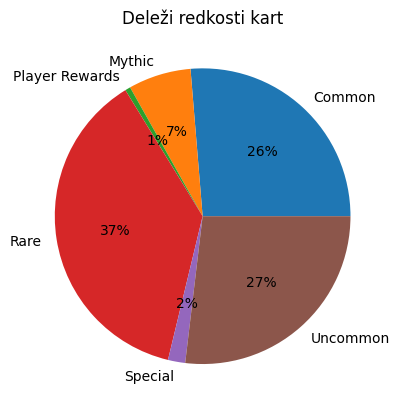

In [322]:
delezi_redkosti = podatkovna_baza.groupby("redkost").size()
delezi_redkosti.plot(kind="pie", autopct='%1.0f%%', title="Deleži redkosti kart")

Na spodnjih dveh grafih bo komu morda presenetljivo dejstvo, da so v povprečju *Rare* karte najdražje (čeprav so okoli 6-krat pogostejše od *Mythic*-ov). Razlog je preprost: *Mythic* karte obstajajo šele od leta 2008, zato so najdražje karte praktično vse *Rare*. Razvidno je, da so ameriške karte v povprečju občutno dražje, prav tako pa je mediana dosti bolj prevzdignjena. Hkrati pa so cenovna razmerja pri ameriških in evropskih kartah zelo podobna, kar razberemo iz podobne oblike grafov.

Text(0, 0.5, 'ameriška cena ($)')

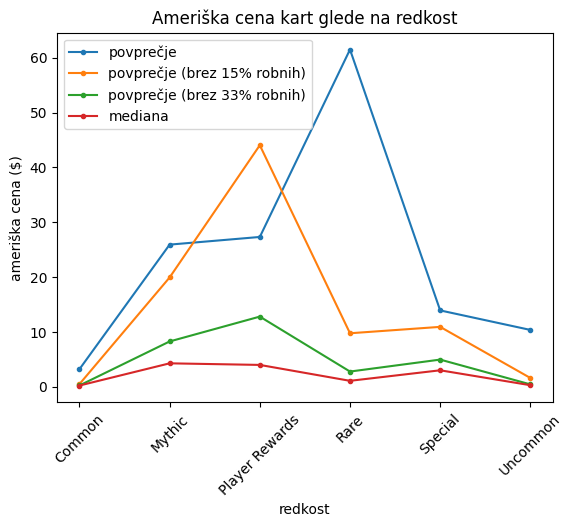

In [323]:
povprecna_cena_glede_na_redkost = podatkovna_baza.groupby("redkost")["povprecna_cena"].mean()
mediana_cena_glede_na_redkost = podatkovna_baza.groupby("redkost")["povprecna_cena"].median()   
povprecna_cena_glede_na_redkost_85 = podatkovna_baza.groupby("redkost").agg({'povprecna_cena': q85})["povprecna_cena"]
povprecna_cena_glede_na_redkost_67 = podatkovna_baza.groupby("redkost").agg({'povprecna_cena': q67})["povprecna_cena"]

df = pd.DataFrame({'povprečje': povprecna_cena_glede_na_redkost,
                   'povprečje (brez 15% robnih)': povprecna_cena_glede_na_redkost_85,
                   'povprečje (brez 33% robnih)': povprecna_cena_glede_na_redkost_67,
                   'mediana': mediana_cena_glede_na_redkost}, index=None)

ax = df.plot(rot=45, title = "Ameriška cena kart glede na redkost", style='.-')
ax.set_ylabel("ameriška cena ($)")



Text(0, 0.5, 'evropska cena (€)')

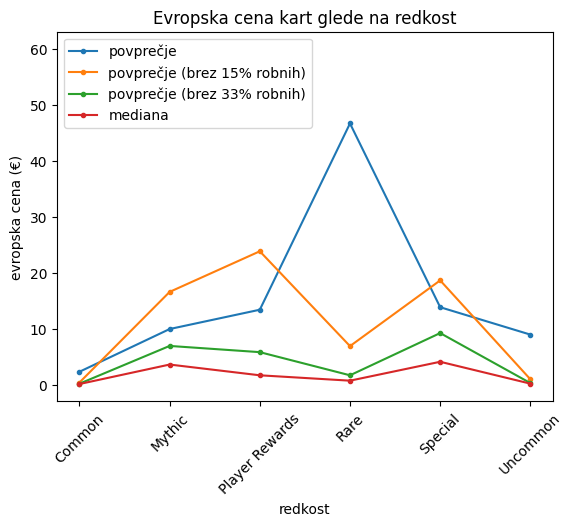

In [324]:
povprecna_cena_glede_na_redkost_eu = podatkovna_baza.groupby("redkost")["povprecje_eu"].mean()
mediana_cena_glede_na_redkost_eu = podatkovna_baza.groupby("redkost")["povprecje_eu"].median()   
povprecna_cena_glede_na_redkost_85_eu = podatkovna_baza.groupby("redkost").agg({'povprecje_eu': q85})["povprecje_eu"]
povprecna_cena_glede_na_redkost_67_eu = podatkovna_baza.groupby("redkost").agg({'povprecje_eu': q67})["povprecje_eu"]

df = pd.DataFrame({'povprečje': povprecna_cena_glede_na_redkost_eu,
                   'povprečje (brez 15% robnih)': povprecna_cena_glede_na_redkost_85_eu,
                   'povprečje (brez 33% robnih)': povprecna_cena_glede_na_redkost_67_eu,
                   'mediana': mediana_cena_glede_na_redkost_eu}, index=None)

ax = df.plot(rot=45, title = "Evropska cena kart glede na redkost", style='.-', ylim=(-3, 63))
ax.set_ylabel("evropska cena (€)")

<AxesSubplot: title={'center': 'Cenovni razredi kart glede na ameriške cene ($)'}>

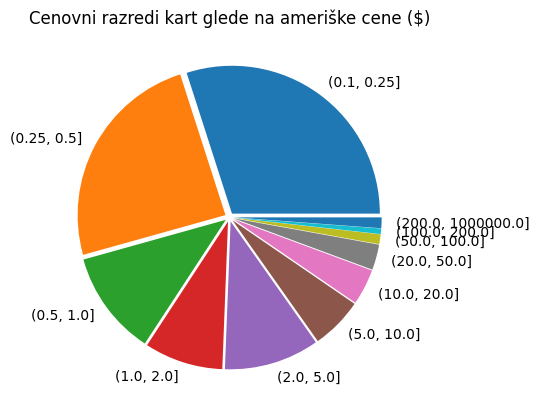

In [325]:
cenovni_razredi_kart = np.array([0, 0.05, 0.10, 0.25, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 1000000])
explode = tuple([0.03 for _ in range(np.size(cenovni_razredi_kart) - 1)])

podatki_po_ceni_us = podatkovna_baza.groupby(pd.cut(podatkovna_baza["povprecna_cena"], cenovni_razredi_kart[2:])).size()
podatki_po_ceni_us.plot(kind = "pie", explode = explode[2:], title='Cenovni razredi kart glede na ameriške cene ($)')


Pri ameriških cenah sem prva dva razreda zanemaril, saj sta bila skoraj popolnoma prazna.

<AxesSubplot: title={'center': 'Cenovni razredi kart glede na evropske cene (€)'}>

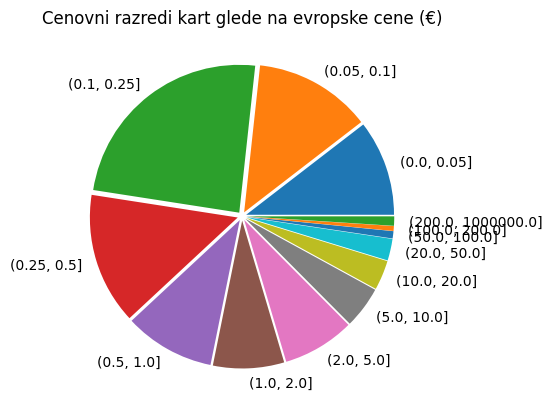

In [326]:
podatki_po_ceni_eu = podatkovna_baza.groupby(pd.cut(podatkovna_baza["povprecje_eu"], cenovni_razredi_kart)).size()
podatki_po_ceni_eu.plot(kind = "pie", explode = explode, title='Cenovni razredi kart glede na evropske cene (€)')

# Analiza različnih tipov kart

Poleg cene in redkosti so me zanimali tudi podatki o raznih tipih [(*type*)](https://mtg.fandom.com/wiki/Card_type) in podtipih [(*subtype*)](https://mtg.fandom.com/wiki/Subtype) kart.

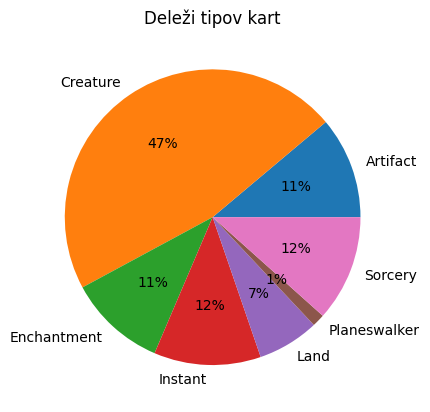

In [327]:
povezovalna_cardtype = pd.read_csv(os.path.join("Podatki", "Povezovalne_tabele", f"povezovalna_cardtype.csv"))
grupa_po_cardtypu = povezovalna_cardtype.groupby("cardtype")
velikost_grupe_po_cardtypu = grupa_po_cardtypu.size()
velikost_grupe_po_cardtypu[velikost_grupe_po_cardtypu > 100].plot.pie(title='Deleži tipov kart', autopct='%1.0f%%')
dovolj_veliki_kljuci_cardtypov = velikost_grupe_po_cardtypu[velikost_grupe_po_cardtypu > 100].keys()


<AxesSubplot: title={'center': 'Frekvenca najpogostejših creature tipov kart'}, xlabel='subtype'>

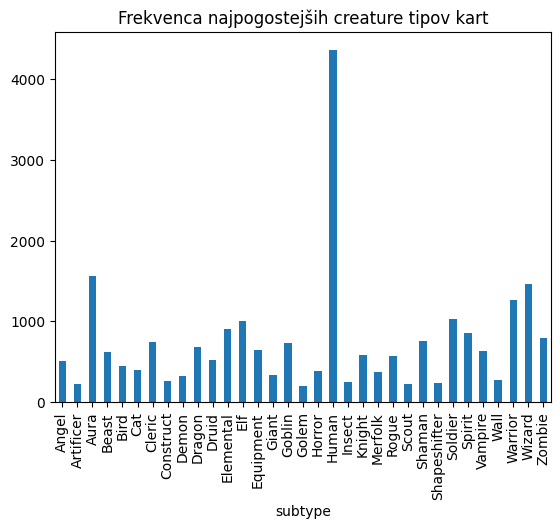

In [328]:
povezovalna_subtype = pd.read_csv(os.path.join("Podatki", "Povezovalne_tabele", "povezovalna_subtype.csv"))
grupa_po_subtypu = povezovalna_subtype.groupby("subtype")
velikost_grupe_po_subtypu = grupa_po_subtypu.size()
velikost_grupe_po_subtypu[velikost_grupe_po_subtypu > 200].plot.bar(title='Frekvenca najpogostejših creature tipov kart')
#povprecna_cena_glede_na_cardtype = podaytkovna_baza.groupby("cardtype")["povprecna_cena"].median()

Na spodnjem grafu razlika med različnimi vrednostmi lepo prikaže, kako majhno število kart po ceni močno odstopa od povprečja.

Text(0, 0.5, 'ameriška cena ($)')

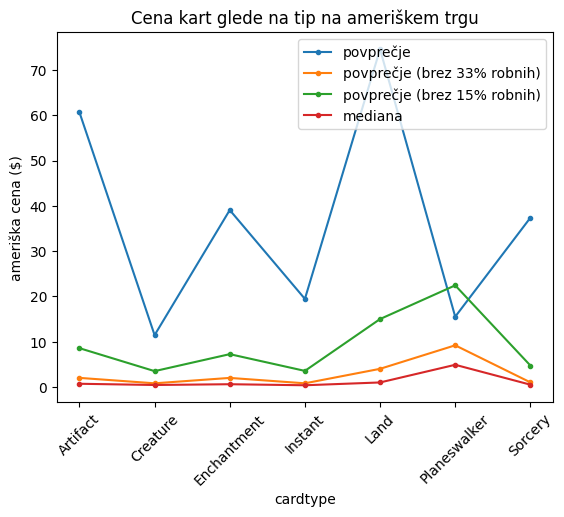

In [329]:
tabela_povprecnih_cen = podatkovna_baza[["id_karte", "povprecna_cena"]].merge(povezovalna_cardtype)
povprecna_cena = tabela_povprecnih_cen.groupby("cardtype")["povprecna_cena"].mean()[dovolj_veliki_kljuci_cardtypov]
povprecna_cena_67 = tabela_povprecnih_cen.groupby("cardtype").agg({'povprecna_cena': q67}).loc[dovolj_veliki_kljuci_cardtypov]["povprecna_cena"]
povprecna_cena_85 = tabela_povprecnih_cen.groupby("cardtype").agg({'povprecna_cena': q85}).loc[dovolj_veliki_kljuci_cardtypov]["povprecna_cena"]
mediana = tabela_povprecnih_cen.groupby("cardtype")["povprecna_cena"].median()[dovolj_veliki_kljuci_cardtypov]

df = pd.DataFrame({'povprečje': povprecna_cena,
                   'povprečje (brez 33% robnih)': povprecna_cena_67,
                   'povprečje (brez 15% robnih)': povprecna_cena_85,
                   'mediana': mediana}, index=dovolj_veliki_kljuci_cardtypov)

ax = df.plot(rot=45, title="Cena kart glede na tip na ameriškem trgu", style='.-')
ax.set_ylabel("ameriška cena ($)")

Text(0, 0.5, 'evropska cena (€)')

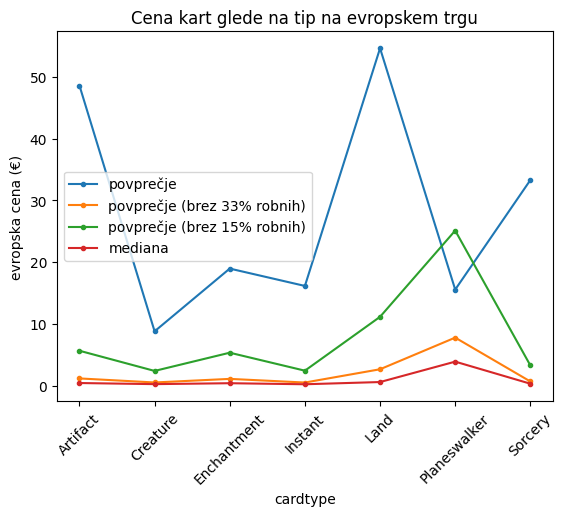

In [330]:
tabela_povprecnih_cen_eu = podatkovna_baza[["id_karte", "povprecje_eu"]].merge(povezovalna_cardtype)
povprecna_cena_eu = tabela_povprecnih_cen_eu.groupby("cardtype")["povprecje_eu"].mean()[dovolj_veliki_kljuci_cardtypov]
povprecna_cena_eu_67 = tabela_povprecnih_cen_eu.groupby("cardtype").agg({'povprecje_eu': q67}).loc[dovolj_veliki_kljuci_cardtypov]["povprecje_eu"]
povprecna_cena_eu_85 = tabela_povprecnih_cen_eu.groupby("cardtype").agg({'povprecje_eu': q85}).loc[dovolj_veliki_kljuci_cardtypov]["povprecje_eu"]
mediana = tabela_povprecnih_cen_eu.groupby("cardtype")["povprecje_eu"].median()[dovolj_veliki_kljuci_cardtypov]

df = pd.DataFrame({'povprečje': povprecna_cena_eu,
                   'povprečje (brez 33% robnih)': povprecna_cena_eu_67,
                   'povprečje (brez 15% robnih)': povprecna_cena_eu_85,
                   'mediana': mediana}, index=dovolj_veliki_kljuci_cardtypov)

ax = df.plot(rot=45, title="Cena kart glede na tip na evropskem trgu", style='.-')
ax.set_ylabel("evropska cena (€)")

# Analiza posameznih setov

Zanimalo me je, kateri seti so bili najbolj in kateri najmanj vredni, ter kakšna je korelacija med starostjo seta ter številom kart in njegovo vrednostjo.

Pri tem je sem gledal porvprečno vrednost kart v setu, saj je ta neodvisna njihovega števila. Povsem po pričakovanju sta na vrhu seta alfa (**LEA = Limited Edition Alpha**) in beta (**LEB = Limited Edition Beta**). 

In [331]:
grupa_setov = podatkovna_baza.groupby("set")
# 10 setov z največ kartami
grupa_setov.apply(len).sort_values(ascending=False).head(10)
grupa_setov['povprecna_cena'].mean().sort_values(ascending=False).head(15)


set
LEA      2022.230601
LEB       913.761745
PSUM      794.680426
2ED       396.113984
ARN       271.257582
CED       110.726471
CEI        94.022894
PTK        91.854121
LEG        91.066000
ATQ        89.785200
PMTG1      61.152171
FBB        51.864368
MED        50.645769
PVAN       39.450000
PARL2      29.823143
Name: povprecna_cena, dtype: float64

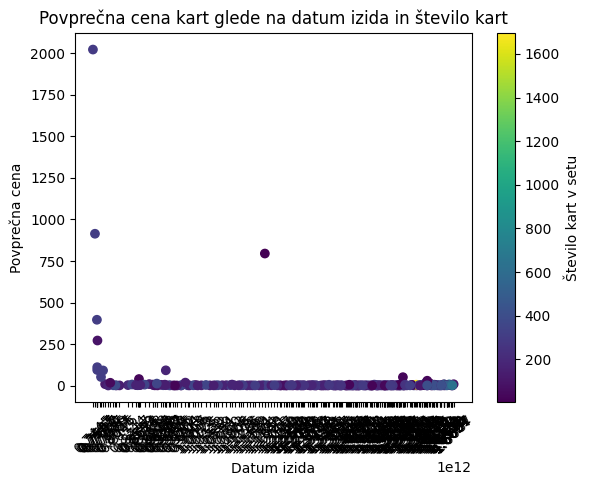

In [402]:
plot_data = grupa_setov[['datum_izida', 'povprecna_cena', 'st_kart']].mean()
plot_data = plot_data[~plot_data['datum_izida'].isna()]

plt.scatter(plot_data['datum_izida'], plot_data['povprecna_cena'], c=plot_data['st_kart'])
plt.xlabel('Datum izida')
plt.ylabel('Povprečna cena')
plt.title('Povprečna cena kart glede na datum izida in število kart')
plt.colorbar(orientation="vertical", label="Število kart v setu")
plt.xticks(rotation=45)
plt.xticks(plot_data['datum_izida'][::50] , [datetime.fromtimestamp(x / 1000).strftime("%d.%m.%Y") for x in plot_data['datum_izida']][::50])
plt.show()


In [400]:
sto = [i for i in range(100)]
sto[::5]

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]